In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df = pd.read_csv('../iris.csv')

print(df)

In [8]:
X = df.iloc[:,1:-1].values


<class 'numpy.ndarray'>


In [9]:
def make_dendrogram(X):
    plt.figure(figsize=(25,10))

    dendrogram(
        linkage(X, 'ward'),
        leaf_font_size=8
    )

    plt.title('Iris Hierarchical Clustering Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Distance')

    plt.axhline(y=8)
    plt.show()

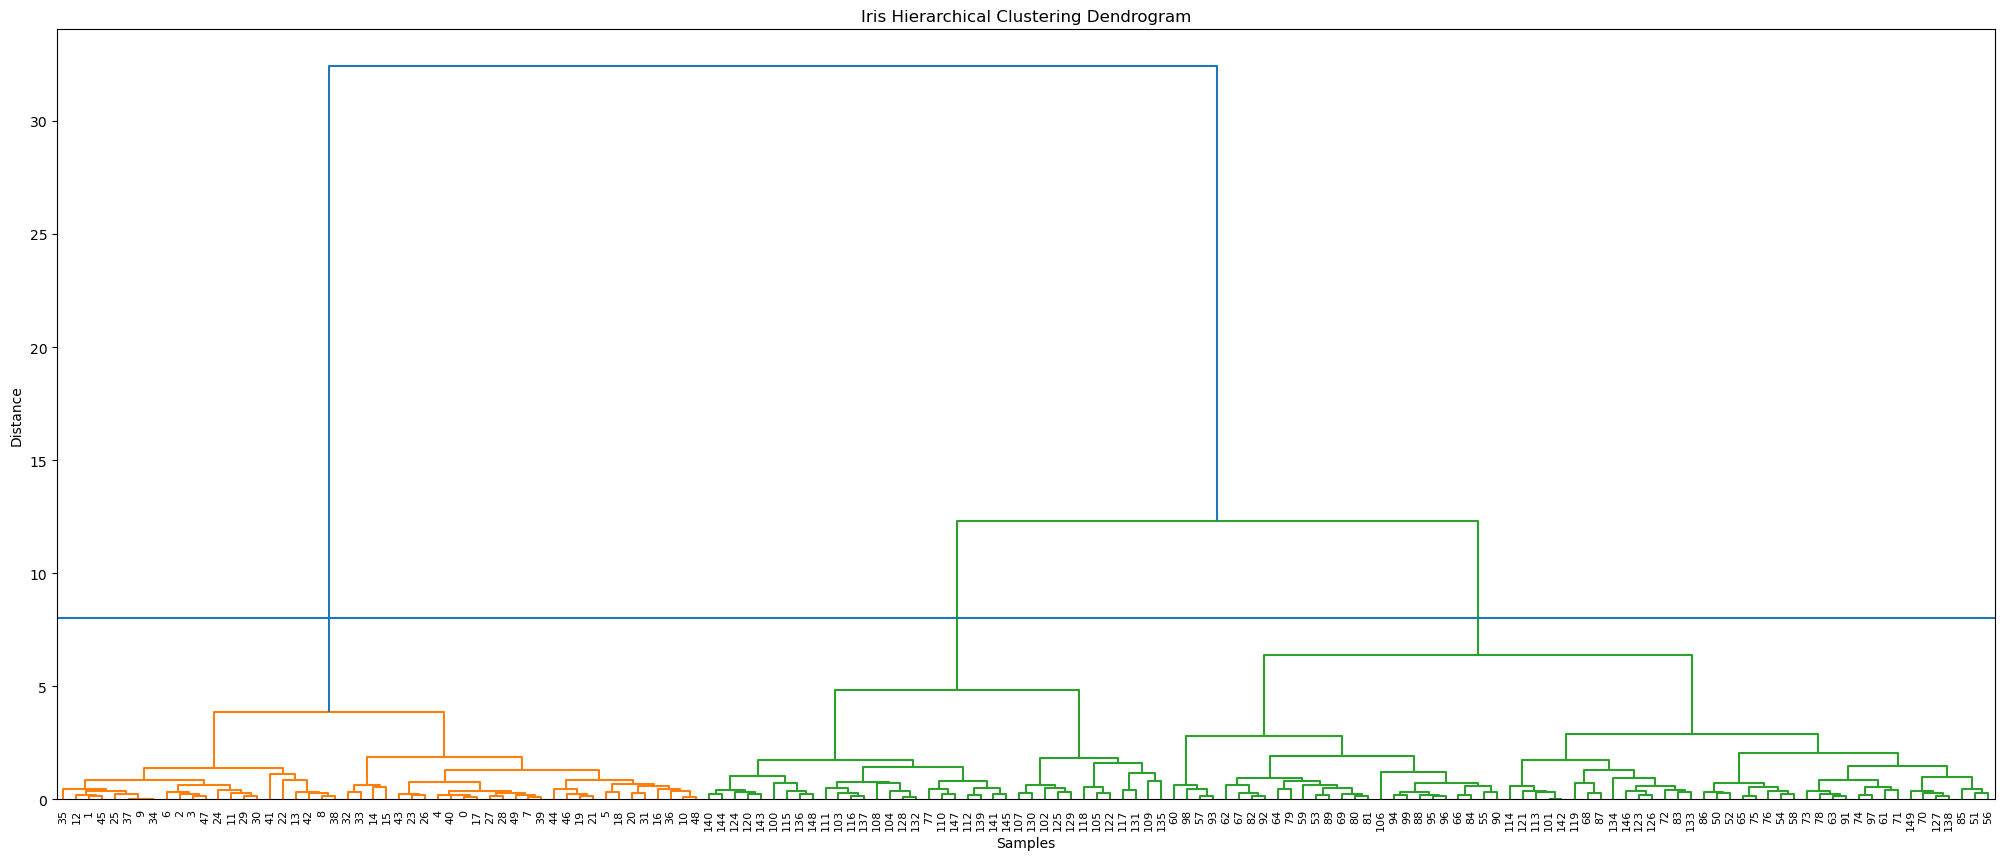

In [11]:
make_dendrogram(X)

In [15]:
def kmeans_clustering(X):
    algo = AgglomerativeClustering(linkage="ward", n_clusters=3)
    return algo.fit_predict(X)

In [23]:
clusters = kmeans_clustering(X)

In [24]:
def plot_cluster_assignments(X):
    _, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

    for i in np.unique(clusters):
        bool_arr = (clusters == i)
        # X[bool_arr] returns rows whose bool_arr[row-nos] contains true
        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],label='Cluster ' + str(i+1), ax=ax[0,0])
        sns.scatterplot(x=X[bool_arr,2], y=X[bool_arr,3],label='Cluster ' + str(i+1), ax=ax[0,1])
        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,2],label='Cluster ' + str(i+1), ax=ax[1,0])
        sns.scatterplot(x=X[bool_arr,1], y=X[bool_arr,3],label='Cluster ' + str(i+1), ax=ax[1,1])


    ax[0,0].set_xlabel('SepalLengthCm')
    ax[0,0].set_ylabel('SepalWidthCm')
    ax[0,0].set_title('Iris Clustering (plot 1)')
    ax[0,1].set_xlabel('PetalLengthCm')
    ax[0,1].set_ylabel('PetalWidthCm')
    ax[0,1].set_title('Iris Clustering (plot 2)')
    ax[1,0].set_xlabel('SepalLengthCm')
    ax[1,0].set_ylabel('PetalLengthCm')
    ax[1,0].set_title('Iris Clustering (plot 3)')
    ax[1,1].set_xlabel('SepalWidthCm')
    ax[1,1].set_ylabel('PetalWidthCm')
    ax[1,1].set_title('Iris Clustering (plot 4)')
    plt.tight_layout(pad=3)
    plt.show()

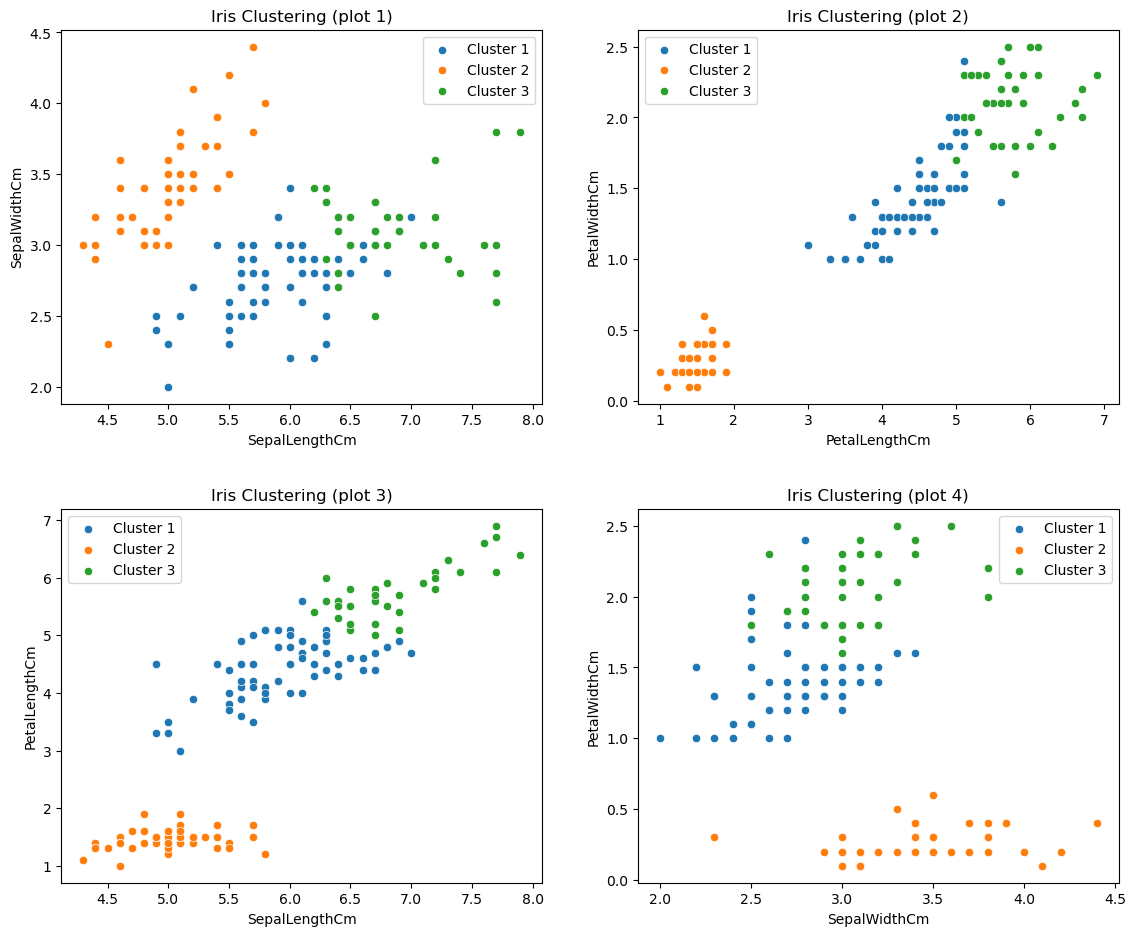

In [25]:
plot_cluster_assignments(X)